In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
mean = train_data.mean(axis=0)

In [ ]:
train_data -=mean
#train_data = train_data  - mean과 같은 표현

In [ ]:
# 표준 편차를 구한다.
std = train_data.std(axis = 0)

In [ ]:
train_data = train_data / std
# train_data /= std


In [ ]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [ ]:
mean = test_data.mean(axis = 0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [ ]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [ ]:
#신경망 구성
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer = 'rmsprop',
                loss ='mse',
                metrics = ['mae'])
  return model

In [ ]:
# K-folder 검증
k = 4

num_val_samples = len(train_data) // k # // :나머지는 버림 #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate( # 0번 축을 기준으로 합치기
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data,
            partial_train_labels,
            epochs=20,
            batch_size=1)
  val_mse, val_mae = model.evaluate(val_data, val_labels)
  all_scores.append(val_mae)


처리중인 폴드 # 0
Epoch 1/20
303/303 [==============================] - 3s 2ms/step - loss: 188.4163 - mae: 10.0918
Epoch 2/20
303/303 [==============================] - 1s 2ms/step - loss: 27.1916 - mae: 3.5497
Epoch 3/20
303/303 [==============================] - 1s 2ms/step - loss: 21.1249 - mae: 3.1850
Epoch 4/20
303/303 [==============================] - 1s 2ms/step - loss: 18.2943 - mae: 2.8050
Epoch 5/20
303/303 [==============================] - 1s 2ms/step - loss: 15.3068 - mae: 2.6167
Epoch 6/20
303/303 [==============================] - 1s 2ms/step - loss: 14.4171 - mae: 2.6076
Epoch 7/20
303/303 [==============================] - 1s 2ms/step - loss: 13.4334 - mae: 2.4021
Epoch 8/20
303/303 [==============================] - 1s 2ms/step - loss: 12.9086 - mae: 2.3927
Epoch 9/20
303/303 [==============================] - 1s 2ms/step - loss: 12.6778 - mae: 2.3795
Epoch 10/20
303/303 [==============================] - 1s 2ms/step - loss: 12.3246 - mae: 2.3605
Epoch 11/20
303/303 [====

In [ ]:
all_scores

[2.100843906402588, 2.3827829360961914, 2.549056053161621, 2.549445390701294]

In [ ]:
np.mean(all_scores)

2.3955320715904236

In [ ]:
# K-folder 검증
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k # // :나머지는 버림 #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate( # 0번 축을 기준으로 합치기
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data,
                      partial_train_labels,
                      epochs=num_epochs,
                      batch_size=1,
                      validation_data = (val_data, val_labels),
                      verbose=0)
  mae_history = history.history['mae']
  all_scores.append(mae_history)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
all_scores

[[10.50184154510498,
  3.7745885848999023,
  3.126404047012329,
  2.8004653453826904,
  2.645139455795288,
  2.6314783096313477,
  2.5714762210845947,
  2.4745795726776123,
  2.464329957962036,
  2.4069154262542725,
  2.3509809970855713,
  2.3021552562713623,
  2.2615535259246826,
  2.2818832397460938,
  2.261873245239258,
  2.180250644683838,
  2.1890976428985596,
  2.1767024993896484,
  2.170974016189575,
  2.049755096435547,
  2.1108295917510986,
  1.9791128635406494,
  2.0197410583496094,
  1.9968194961547852,
  2.0167853832244873,
  1.9400380849838257,
  1.970481514930725,
  1.9464695453643799,
  1.9437798261642456,
  1.944417953491211,
  1.8798267841339111,
  1.909019947052002,
  1.9014167785644531,
  1.9234157800674438,
  1.8345407247543335,
  1.8033719062805176,
  1.8348982334136963,
  1.8465521335601807,
  1.7837538719177246,
  1.8352761268615723,
  1.8011212348937988,
  1.7670527696609497,
  1.8136991262435913,
  1.7672454118728638,
  1.7365959882736206,
  1.7796146869659424,

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]#x의 i에 모든 값을 넣고 평균값을 도출

Text(0, 0.5, 'Validation MAE')

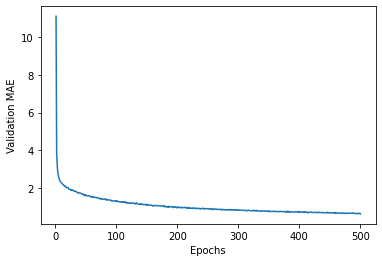

In [ ]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')